AS de Linguagens de Programação – 12/12/2018
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a):

In [1]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

Entre com o seu nome completo: Danillo Fiorenza
Olá, Danillo Fiorenza!
Bom trabalho!


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import random
import re
import string
import time
import pymysql
import sqlite3
import getpass
import pandas.io.sql as psql
import networkx as nx
import math   #importei
from bs4 import BeautifulSoup as bs
from IPython.display import clear_output
from IPython.display import Image
%matplotlib inline

Questão 1 (2,5 pontos)   

Escreva uma função (ou conjunto de funções) que extraia(m) todos os candidatos a nomes próprios de uma página web (recebida como uma string) e os devolva em uma lista. Realize todas as etapas de tratamento do texto.
Se desejar, utilize o código abaixo como parte de sua solução.

In [219]:
url = 'http://emap.fgv.br/corpo-docente/renato-rocha-souza' # exemplo de URL
page = requests.get(url)
html = page.text
sopa = bs(html, "lxml")
texto = sopa.text

ConnectionError: HTTPConnectionPool(host='emap.fgv.br', port=80): Max retries exceeded with url: /corpo-docente/renato-rocha-souza (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f779addc668>: Failed to establish a new connection: [Errno 110] Connection timed out',))

In [ ]:
palavras = texto.split()
palavras= [p.strip(string.punctuation+'«'+'»') for p in palavras]

In [ ]:
maiusculas=[]
for k in palavras:
    if k!='':
        if k[0] in string.ascii_uppercase or k[0] in 'ÁÉÍÓÚÂÊÛÔÃÕÀ':
            if (k not in maiusculas) :
                maiusculas.append(k)
print(maiusculas) #candidatos a nomes própios são palavras que começam com letra maiuscula

Questão 2 (2.5 pontos)  

Com uma linguagem de programação como Python, podemos manipular e visualizar dados numéricos.  
    a) Escreva uma função que gere uma lista com os n primeiros números primos.  
    b) Escreva uma função que receba n listas de números e “plote” estas sequências em um único gráfico. Teste a função com os números primos gerados.  
    c) Examine e compare, em um histograma, a frequência de primos terminados em 1, 3, 5, 7 e 9.  

In [187]:
#a)
def eprimo(n):
    if n!=1:        
        for x in range(2, int(n**0.5)+1):
            if n % x == 0:
                return False
        return True
    else:
        return False
    
def primos(n):
    lista=[]
    p=1
    while len(lista)<n:
        if eprimo(p)==True:
            lista.append(p)
        p=p+1
    return lista

primos(2)

[2, 3]

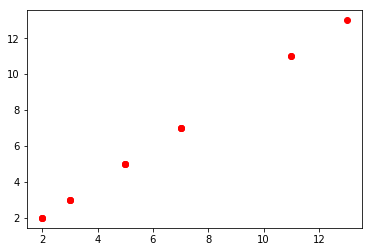

In [193]:
#b)
def plotar(*args):
    for n in args:
        plt.plot(n,n,'ro')
    plt.show()
plotar(primos(4),primos(5),primos(6))


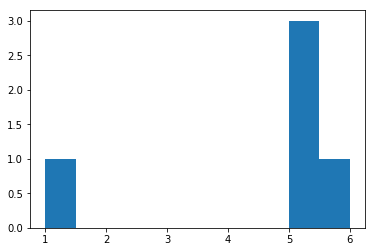

In [218]:
#c)
def histograma(n):
    a=0 #quantidade de numeros que terminam em 1
    b=0 #quantidade de numeros que terminam em 3    
    c=0 #quantidade de numeros que terminam em 5
    d=0 #quantidade de numeros que terminam em 7
    e=0 #quantidade de numeros que terminam em 9
    for i in primos(n):
        k=int(repr(i)[-1])
        if k==1:
            a=a+1
        elif k==3:
            b=b+1
        elif k==5:
            c=c+1
        elif k==7:
            d=d+1
        else:
            e=e+1
    plt.hist([a,b,c,d,e])
    plt.show
    
    
histograma(22)

Questão 3 (2.5 pontos)

Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Utilizando um comando SQL e as tabelas "invoices", "invoice_items", "customers" e "tracks", mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Quais clientes contêm a letra "o" tanto no nome como no sobrenome?  
c) Crie um histograma de faixas ("tracks") mais compradas, usando o matplotlib.  
d) Qual o cliente ("customers") que teve gasto médio em compras ("invoices") com o valor mais próximo do valor médio do total de compras de todos os clientes?  
e) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [47]:
conn = sqlite3.connect('../../Dados/chinook.sqlite')
cur = conn.cursor()

In [12]:
#a)
#Letra a
cur.execute('''SELECT customers.FirstName,customers.LastName, tracks.Name FROM customers 
            INNER JOIN invoices ON customers.customerID = invoices.customerID
            INNER JOIN invoice_items ON invoices.invoiceID = invoice_items.invoiceID
            INNER JOIN tracks ON invoice_items.trackID = tracks.trackID WHERE customers.FirstName LIKE "M%"''')
for r in cur.fetchall():
    print(r)

In [ ]:
#b)
cur.execute('SELECT FirstName,LastName FROM customers WHERE FirstName LIKE "%o%" and LastName LIKE "%o%"')
for r in cur.fetchall():
    print(r)

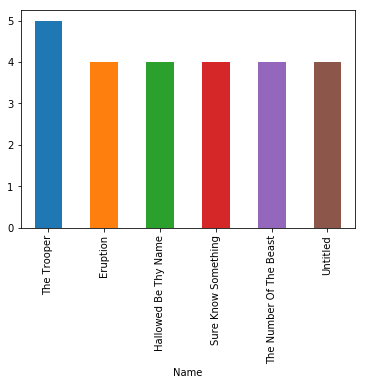

In [54]:
#c)
q2 = 'select sum(invoice_items.quantity) as p, tracks.name from invoice_items inner join tracks on invoice_items.trackID = tracks.trackID group by tracks.name order by p desc'
tracks=pd.read_sql_query(q2,conn)
maiscompradas=tracks.iloc[0:6]
maiscompradas.plot(x='Name', y='p', kind='bar', legend=False)

In [145]:
#d)
q='''
select *,abs(p-avg(p)) as k from (select invoices.customerID,avg(invoice_items.UnitPrice * invoice_items.Quantity) as p from invoices
inner join customers on customers.CustomerId = invoices.customerID 
inner join invoice_items on invoices.InvoiceId = invoice_items.InvoiceId
group by invoices.customerID) order by k desc'''

cur.execute(q)
for r in cur.fetchall():
    print(r)

(59, 1.0177777777777774, 0.021756368321935282)


(('customerID', None, None, None, None, None, None),
 ('p', None, None, None, None, None, None),
 ('k', None, None, None, None, None, None))

In [149]:
#d)
q='select FirstName,LastName from customers where customerId=59'
cur.execute(q)
for r in cur.fetchall():
    print(r)

('Puja', 'Srivastava')


In [ ]:
#e)
q='''
select tracks.Composer, albums.Title from albums
join tracks on tracks.AlbumId=albums.AlbumId
group by albums.Title'''

cur.execute(q)
dicionario={}
for r in cur.fetchall():
    a,b=r
    if a in dicionario:
        dicionario[a].append(b)
    else:
        dicionario[a]=[b]
print(dicionario)

Questão 4 (2.5 pontos) 

Veja as figuras a seguir:

In [3]:
Image(url="../../Dados/bicicleta.jpg")

In [2]:
Image(url="../../Dados/bicicleta-convencional.jpg")

Implemente em Python uma classe chamada “Bicicleta” com as seguintes propriedades:
    + Quando instanciada, tem seu odômetro zerado
    + Quando instanciada, recebe os valores dos raios (R) dos pinhões traseiro (B) e dianteiro (A). 
    Na primeira figura acima, estes valores são apenas indicados, como R e 4R (desconsidere).  
    + Possua um método "odometro" para dizer o quanto já percorreu, em Km.  
    + Possua um método "pedalar" que recebe um valor de rotações por minuto e um tempo, em minutos.
    + Considere que o raio da roda + pneu traseiros possua 0,5 metros, como indicado na figura.
Instancie a classe e simule alguns percursos.

In [1]:
class bicicleta:
    def __init__(self,B,A):
        self.traseiro=B
        self.dianteiro=A
        self.percorreu = 0
    def odometro(self):
        print('Essa bike já percorreu {0:.2f} KM'.format(self.percorreu))
    def pedalar(self,rpm,t):
        self.rpm=rpm
        self.t=t
        self.rotacoesdianteira=self.rpm*self.t
        self.rotacoestraseira=(self.dianteiro/self.traseiro)*self.rotacoesdianteira
        self.m=2*math.pi*(0.5)*self.rotacoestraseira
        self.km=self.m/1000
        self.percorreu=self.percorreu+self.km
        print('Pedalei {0:.2f} KM'.format(self.km))      

In [2]:
pratinha=bicicleta(1,4)

In [133]:
pratinha.pedalar(120,8)

Pedalei 12.06 KM


In [134]:
pratinha.pedalar(40,15)

Pedalei 7.54 KM


In [135]:
pratinha.odometro()

Essa bike já percorreu 19.60 KM


In [ ]:
pratinha.